In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import h5py

from sklearn import model_selection, feature_selection, linear_model, metrics

In [ ]:
print("Import data")

X = pd.read_hdf('drive/My Drive/data_window_botnet3.h5', key='data')
X.reset_index(drop=True, inplace=True)

X2 = pd.read_hdf('drive/My Drive/data_window3_botnet3.h5', key='data')
X2.reset_index(drop=True, inplace=True)

X = X.join(X2)

X.drop('window_id', axis=1, inplace=True)

y = X['Label_<lambda>']
X.drop('Label_<lambda>', axis=1, inplace=True)

labels = np.load("drive/My Drive/data_window_botnet3_labels.npy",allow_pickle=True)
#print(X)
#print(y)
print(X.columns.values)
print(labels)

y_bin6 = y==6
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_bin6, test_size=0.33, random_state=123456)
#y_train_bin6 = y_train==6
#y_test_bin6 = y_test==6

print("y", np.unique(y, return_counts=True))
print("y_train", np.unique(y_train, return_counts=True))
print("y_test", np.unique(y_test, return_counts=True))

Import data
['counts' 'Sport_nunique' 'DstAddr_nunique' 'Dport_nunique' 'Dur_sum'
 'Dur_mean' 'Dur_std' 'Dur_max' 'Dur_median' 'TotBytes_sum'
 'TotBytes_mean' 'TotBytes_std' 'TotBytes_max' 'TotBytes_median'
 'SrcBytes_sum' 'SrcBytes_mean' 'SrcBytes_std' 'SrcBytes_max'
 'SrcBytes_median' 'Sport_RU' 'DstAddr_RU' 'Dport_RU']
['flow=Background' 'flow=From-Norma' 'flow=Normal-V44' 'flow=From-Backg'
 'flow=To-Backgro' 'flow=To-Normal-' 'flow=From-Botne']
y (array([0, 1, 2, 3, 4, 5, 6]), array([1903499,    5483,       5,     986,  112392,     679,    1009]))
y_train (array([False,  True]), array([1355453,     662]))
y_test (array([False,  True]), array([667591,    347]))


In [ ]:
## Embedded Method
print("Logistic Regression")

clf = linear_model.LogisticRegression(penalty='l2', C=1.0, random_state=123456, multi_class="auto", class_weight=None, solver="lbfgs", max_iter=1000, verbose=1)
clf.fit(X_train, y_train)
#print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)

y_pred = clf.predict(X_test)
#y_pred_bin6 = y_pred==6
#print(clf.predict_proba(X_test))
print("accuracy score = ", metrics.balanced_accuracy_score(y_test, y_pred))
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_test, y_pred)
print("precision = ", precision[1])
print("recall = ", recall[1])
print("fbeta_score = ", fbeta_score[1])
print("support = ", support[1])

clf = linear_model.LogisticRegression(penalty='l2', C=1.0, random_state=123456, multi_class="auto", class_weight='balanced', solver="lbfgs", max_iter=1000, verbose=1)
clf.fit(X_train, y_train)

Logistic Regression


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.6s finished


[[-12.7300268    4.49402253   1.14320967  -3.38644915  -4.06431894
    0.63903042  -1.39606503   0.7825373    0.73065905  -1.0251572
   -0.1021964   -0.14445409  -0.17309872  -0.09232024  -0.70083035
   -0.06365598  -0.06477286  -0.09801864  -0.0571462    3.35793649
    1.9703999   -1.9060548 ]]
[-11.72852997]
accuracy score =  0.9207447857695161
precision =  0.9798657718120806
recall =  0.8414985590778098
fbeta_score =  0.9054263565891473
support =  347


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=123456,
                   verbose=1)

In [ ]:
#print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)

y_pred = clf.predict(X_test)
#y_pred_bin6 = y_pred==6
#print(clf.predict_proba(X_test))
print("accuracy score = ", metrics.balanced_accuracy_score(y_test, y_pred))
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_test, y_pred)
print("precision = ", precision[1])
print("recall = ", recall[1])
print("fbeta_score = ", fbeta_score[1])
print("support = ", support[1])

clf = linear_model.LogisticRegression(penalty='l2', C=1.0, random_state=123456, multi_class="auto", class_weight={0:0.5, 1:0.5}, solver="lbfgs", max_iter=1000, verbose=1)
clf.fit(X_train, y_train)

[[-30.88407366  10.11525867   2.25933748   1.00393705 -12.04662231
    8.03011017  -0.44585853   0.82376994  -4.5615298   -4.29957497
    0.07690348   0.30405646  -0.44241573  -0.95719713  -2.32425672
    1.1491588   -0.67370243  -0.09689561   1.38809954  -0.24707352
    0.49439055  -0.90777408]]
[-4.4272191]
accuracy score =  0.9742221307851189
precision =  0.01750490550449241
recall =  0.9769452449567724
fbeta_score =  0.03439354740526556
support =  347


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.7s finished


LogisticRegression(class_weight={0: 0.5, 1: 0.5}, max_iter=1000,
                   random_state=123456, verbose=1)

In [ ]:
#print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)

y_pred = clf.predict(X_test)
#y_pred_bin6 = y_pred==6
#print(clf.predict_proba(X_test))
print("accuracy score = ", metrics.balanced_accuracy_score(y_test, y_pred))
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(y_test, y_pred)
print("precision = ", precision[1])
print("recall = ", recall[1])
print("fbeta_score = ", fbeta_score[1])
print("support = ", support[1])

[[-9.93099513  3.79526125  0.97520262 -2.41832508 -3.44171513  0.66917922
  -1.1166983   0.45095942  0.72638471 -0.78761457 -0.07281281 -0.10666677
  -0.14531606 -0.06562597 -0.4755926  -0.04365187 -0.04174843 -0.06212565
  -0.04059652  4.11922445  2.05655705 -1.89288455]]
[-11.56212469]
accuracy score =  0.9207447857695161
precision =  0.9798657718120806
recall =  0.8414985590778098
fbeta_score =  0.9054263565891473
support =  347


Logistic Regression Cross Validation
[0.         0.01111111 0.02222222 0.03333333 0.04444444 0.05555556
 0.06666667 0.07777778 0.08888889 0.1       ]
{'fit_time': array([8.36906052, 8.40801048, 8.40606046, 8.64292359, 8.59305692,
       8.55821371, 9.07074785, 8.24736547, 9.0198667 , 8.84454179]), 'score_time': array([0.17317772, 0.17282152, 0.17236757, 0.17933369, 0.17332029,
       0.17888665, 0.1731298 , 0.17219615, 0.17176962, 0.17451024]), 'test_precision': array([0.00044244, 0.00048668, 0.0005088 , 0.00044244, 0.00056042,
       0.00049406, 0.00055305, 0.00045719, 0.00049406, 0.00064891]), 'train_precision': array([0.00049324, 0.00048832, 0.00048587, 0.00049324, 0.00048013,
       0.0004875 , 0.00048095, 0.0004916 , 0.0004875 , 0.0004703 ]), 'test_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_f1': array([0.00088449, 0.00097289, 0.00101709, 0.00088449, 0.00112022,
       0.00098763, 0.00110549, 0.00

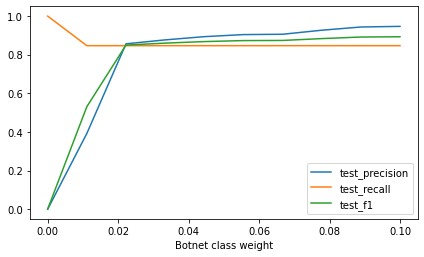

In [ ]:
#main problems:
#with class_weight='balanced', super high recall but very low precision
#without, high precision but very low recall
#accuracy score not a good metric (even balanced_accuracy)

print("Logistic Regression Cross Validation")

def apply_logreg_cross_validation(X, y, svc_args={'penalty':'l2', 'C':1.0, 'random_state':123456, 'multi_class':"auto", 'class_weight':None, 'solver':"lbfgs", 'max_iter':1000, 'verbose':1}):
    clf = linear_model.LogisticRegression(**svc_args)
    cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.1, random_state=123456)
    scores = model_selection.cross_validate(clf, X, y, cv=cv, scoring=['precision', 'recall', 'f1'], return_train_score=True)
    print(scores)
    return [np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1'])]

tab_class_weight = np.linspace(0, 0.1, 10)
print(tab_class_weight)

tab_score = np.array([apply_logreg_cross_validation(X_train, y_train, {'penalty':'l2', 'C':1.0, 'random_state':123456, 'multi_class':"auto", 'class_weight':{0:w, 1:1-w}, 'solver':"lbfgs", 'max_iter':1000, 'verbose':0}) for w in tab_class_weight])
print(tab_score)

plt.plot(tab_class_weight, tab_score[:, 0])
plt.plot(tab_class_weight, tab_score[:, 1])
plt.plot(tab_class_weight, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("Botnet class weight")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_class_weight.pdf", format="pdf")
plt.show()


[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
[-2. -1.  0.  1.  2.  3.  4.  5.  6.]
{'fit_time': array([7.79687953, 5.972507  , 6.30444145]), 'score_time': array([0.17484021, 0.1750071 , 0.17432499]), 'estimator': [LogisticRegression(C=0.01, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=0.01, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=0.01, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.72058824, 0.73417722, 0.6835443 ]), 'train_precision': array([0.69891008, 0.69517241, 0.70068966]), 'test_recall': array([0.81666667, 0.87878788, 0.7826087 ]), 'train_recall': array([0.85215947, 0.84563758, 0.85666105]), 'test_f1': array([0.765625  , 0.8       , 0.72972973]), 'train_f1': array([0.76796407, 0.76305829, 0.77086495])}
{'fit_time': array([12.63797235, 11.91131568, 12.4

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([227.92320395, 231.10240531, 226.84455252]), 'score_time': array([0.17298746, 0.17753887, 0.17664409]), 'estimator': [LogisticRegression(C=10000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=10000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=10000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([1.        , 0.98305085, 0.98181818]), 'train_precision': array([0.98846154, 0.98825832, 0.99027237]), 'test_recall': array([0.81666667, 0.87878788, 0.7826087 ]), 'train_recall': array([0.8538206 , 0.84731544, 0.85834739]), 'test_f1': array([0.89908257, 0.928     , 0.87096774]), 'train_f1': array([0.91622103, 0.91237579, 0.91960253])}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([225.54897404, 233.00529432, 234.26938462]), 'score_time': array([0.17421484, 0.18274331, 0.17381072]), 'estimator': [LogisticRegression(C=100000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=100000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=100000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.98      , 0.96666667, 0.96428571]), 'train_precision': array([0.98279159, 0.98825832, 0.98643411]), 'test_recall': array([0.81666667, 0.87878788, 0.7826087 ]), 'train_recall': array([0.8538206 , 0.84731544, 0.85834739]), 'test_f1': array([0.89090909, 0.92063492, 0.864     ]), 'train_f1': array([0.91377778, 0.91237579, 0.91794409])}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([229.98102713, 230.78724647, 230.19950581]), 'score_time': array([0.17342782, 0.17347193, 0.17464948]), 'estimator': [LogisticRegression(C=1000000.0, class_weight={0: 0.044, 1: 0.956},
                   max_iter=1000, random_state=123456), LogisticRegression(C=1000000.0, class_weight={0: 0.044, 1: 0.956},
                   max_iter=1000, random_state=123456), LogisticRegression(C=1000000.0, class_weight={0: 0.044, 1: 0.956},
                   max_iter=1000, random_state=123456)], 'test_precision': array([0.98      , 0.96666667, 0.96428571]), 'train_precision': array([0.98467433, 0.98825832, 0.98643411]), 'test_recall': array([0.81666667, 0.87878788, 0.7826087 ]), 'train_recall': array([0.8538206 , 0.84731544, 0.85834739]), 'test_f1': array([0.89090909, 0.92063492, 0.864     ]), 'train_f1': array([0.91459075, 0.91237579, 0.91794409])}
[[0.7127699180938198 0.8260210803689064 0.7651182432432434
  array([-3.23924471e-01,  1.03175844e-01,  6.79960256e-01, -1.35695138e-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


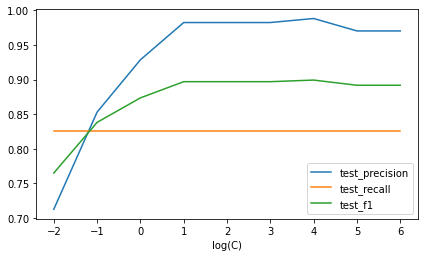

[[-3.23924471e-01  1.03175844e-01  6.79960256e-01 -1.35695138e-01
  -5.74151863e-01  2.83532198e-01 -2.00988187e-01  1.34649982e-01
   2.90715631e-01 -1.38085142e-01 -4.22758134e-03 -1.27389599e-02
  -8.55084161e-02 -3.24417162e-03 -3.24875332e-02 -1.06059394e-03
  -1.79798614e-03 -1.97445436e-02 -1.01963551e-03  4.26600673e-01
   7.69578620e-01 -1.15357914e+00]
 [-1.98300139e+00  8.79125907e-01  6.28004716e-01 -6.26437479e-01
  -1.39985885e+00  4.95039130e-01 -4.85757511e-01  2.01539353e-01
   5.04423992e-01 -3.62001474e-01 -1.64593056e-02 -3.96561938e-02
  -1.99720282e-01 -1.40304681e-02 -6.94497348e-02 -6.13634504e-03
  -5.87703378e-03 -1.22646599e-02 -6.23028354e-03  1.25243146e+00
   1.50318508e+00 -1.63414683e+00]
 [-9.82588442e+00  4.02438183e+00  8.26637601e-01 -8.62944824e-01
  -3.80200329e+00  7.90051288e-01 -9.13253038e-01  5.90857511e-01
   7.90462656e-01 -7.20281915e-01 -6.55303216e-02 -8.22749576e-02
  -1.78278648e-01 -6.15666757e-02 -2.52360460e-01 -2.60124757e-02
  -2.5

In [ ]:
# Results: class_weight_best = 0.044

def apply_logreg_cross_validation_coeff(X, y, svc_args={'penalty':'l2', 'C':1.0, 'random_state':123456, 'multi_class':"auto", 'class_weight':None, 'solver':"lbfgs", 'max_iter':1000, 'verbose':1}):
    clf = linear_model.LogisticRegression(**svc_args)
    #cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.1, random_state=123456) #for l2
    cv = model_selection.ShuffleSplit(n_splits=3, test_size=0.1, random_state=123456) #for l1
    scores = model_selection.cross_validate(clf, X, y, cv=cv, scoring=['precision', 'recall', 'f1'], return_train_score=True, return_estimator=True)
    print(scores)
    return [np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1']), np.mean([model.coef_[0] for model in scores['estimator']], axis=0)]

tab_C = np.logspace(-2, 6, 9)
tab_logC = np.log10(tab_C)
print(tab_C)
print(tab_logC)

tab_score = np.array([apply_logreg_cross_validation_coeff(X_train, y_train, {'penalty':'l2', 'C':C, 'random_state':123456, 'multi_class':"auto", 'class_weight':{0:0.044, 1:1-0.044}, 'solver':"lbfgs", 'max_iter':1000, 'verbose':0}) for C in tab_C])
print(tab_score)

plt.plot(tab_logC, tab_score[:, 0])
plt.plot(tab_logC, tab_score[:, 1])
plt.plot(tab_logC, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("log(C)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_C.pdf", format="pdf")
plt.show()

matrix_coeff = np.stack(tab_score[:, 3], axis=0)
print(matrix_coeff)
print(matrix_coeff.shape)


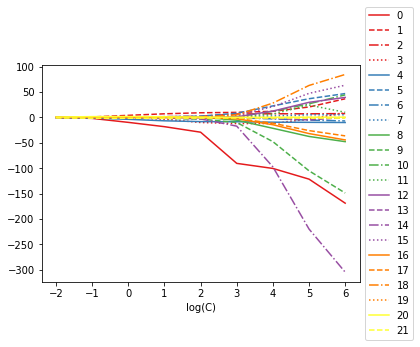

[[-3.23924471e-01  1.03175844e-01  6.79960256e-01 -1.35695138e-01
  -5.74151863e-01  2.83532198e-01 -2.00988187e-01  1.34649982e-01
   2.90715631e-01 -1.38085142e-01 -4.22758134e-03 -1.27389599e-02
  -8.55084161e-02 -3.24417162e-03 -3.24875332e-02 -1.06059394e-03
  -1.79798614e-03 -1.97445436e-02 -1.01963551e-03  4.26600673e-01
   7.69578620e-01 -1.15357914e+00]
 [-1.98300139e+00  8.79125907e-01  6.28004716e-01 -6.26437479e-01
  -1.39985885e+00  4.95039130e-01 -4.85757511e-01  2.01539353e-01
   5.04423992e-01 -3.62001474e-01 -1.64593056e-02 -3.96561938e-02
  -1.99720282e-01 -1.40304681e-02 -6.94497348e-02 -6.13634504e-03
  -5.87703378e-03 -1.22646599e-02 -6.23028354e-03  1.25243146e+00
   1.50318508e+00 -1.63414683e+00]
 [-9.82588442e+00  4.02438183e+00  8.26637601e-01 -8.62944824e-01
  -3.80200329e+00  7.90051288e-01 -9.13253038e-01  5.90857511e-01
   7.90462656e-01 -7.20281915e-01 -6.55303216e-02 -8.22749576e-02
  -1.78278648e-01 -6.15666757e-02 -2.52360460e-01 -2.60124757e-02
  -2.5

In [ ]:
ax = plt.subplot(111)
NUM_COLORS = matrix_coeff.shape[1]
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('Set1')

for i in range(0, matrix_coeff.shape[1]):
    lines = ax.plot(tab_logC, matrix_coeff[:, i])
    lines[0].set_color(cm(i//NUM_STYLES))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.xlabel("log(C)")
plt.xticks(label=np.log(tab_C))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
ax.legend(np.arange(0, matrix_coeff.shape[1]), loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("cross_validation_C_coeff.pdf", format="pdf")
plt.show()

print(matrix_coeff)


[ 550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
{'fit_time': array([102.84380054, 158.00249481, 129.63470387]), 'score_time': array([0.17653131, 0.17422581, 0.17446661]), 'estimator': [LogisticRegression(C=550.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=550.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=550.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([1.        , 0.98305085, 0.96428571]), 'train_precision': array([0.98279159, 0.98440546, 0.98643411]), 'test_recall': array([0.81666667, 0.87878788, 0.7826087 ]), 'train_recall': array([0.8538206 , 0.84731544, 0.85834739]), 'test_f1': array([0.89908257, 0.928     , 0.864     ]), 'train_f1': array([0.91377778, 0.91073039, 0.91794409])}
{'fit_time': array([120.09439921, 131.65246654, 142.58312368]), 'score_time': arra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


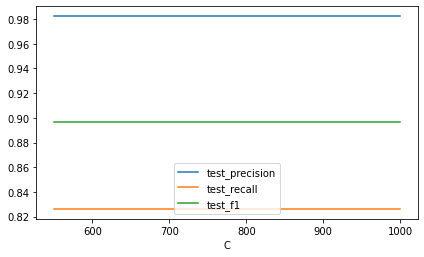

[[-6.43248041e+01  9.67914475e+00  4.75846322e+00 -1.25764550e+01
  -8.46643387e+00  5.97318558e+00 -7.19443758e-01  1.29883369e+00
  -3.38760030e+00 -6.63705182e+00  4.68461335e-01  2.73112849e-01
   6.72677763e-02 -4.62570114e-01 -1.00796623e+01  2.00166084e+00
  -1.68020267e+00 -1.38512459e+00  2.74541798e+00 -1.24681989e-01
   3.46408394e-01 -1.26815689e+00]
 [-6.89471849e+01  9.69050643e+00  5.09972679e+00 -1.24616578e+01
  -8.46543285e+00  6.24858872e+00 -7.52122149e-01  1.32219465e+00
  -3.68667247e+00 -6.93115799e+00  5.98528228e-01  4.06841678e-01
   1.37089563e-01 -3.96923266e-01 -1.05965375e+01  2.05999806e+00
  -1.74715850e+00 -1.46232664e+00  2.82858862e+00 -1.24925769e-01
   3.28104653e-01 -1.26806398e+00]
 [-7.36265109e+01  9.70306610e+00  5.44548916e+00 -1.24327070e+01
  -8.47618595e+00  6.57090352e+00 -7.73888314e-01  1.33022100e+00
  -4.01548039e+00 -7.35822159e+00  7.29210167e-01  5.41922186e-01
   2.43239064e-01 -3.60403453e-01 -1.13648168e+01  2.19251501e+00
  -1.8

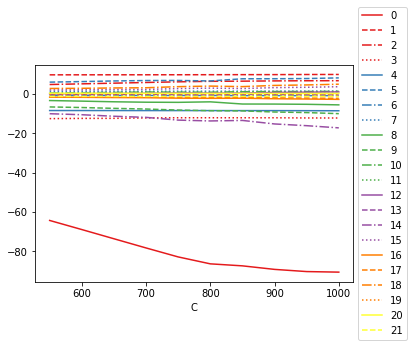

In [ ]:

tab_C = np.linspace(550, 1000, 10)
print(tab_C)

tab_score = np.array([apply_logreg_cross_validation_coeff(X_train, y_train, {'penalty':'l2', 'C':C, 'random_state':123456, 'multi_class':"auto", 'class_weight':{0:0.044, 1:1-0.044}, 'solver':"lbfgs", 'max_iter':1000, 'verbose':0}) for C in tab_C])
print(tab_score)

plt.plot(tab_C, tab_score[:, 0])
plt.plot(tab_C, tab_score[:, 1])
plt.plot(tab_C, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("C")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_C.pdf", format="pdf")
plt.show()

matrix_coeff = np.stack(tab_score[:, 3], axis=0)
print(matrix_coeff)
print(matrix_coeff.shape)

ax = plt.subplot(111)
NUM_COLORS = matrix_coeff.shape[1]
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('Set1')

for i in range(0, matrix_coeff.shape[1]):
    lines = ax.plot(tab_C, matrix_coeff[:, i])
    lines[0].set_color(cm(i//NUM_STYLES))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.xlabel("C")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
ax.legend(np.arange(0, matrix_coeff.shape[1]), loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("cross_validation_C_coeff.pdf", format="pdf")
plt.show()


In [ ]:
tab_C = np.linspace(50, 1000, 20)
print(tab_C)

print(tab_score)



[  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000.]
[[0.9824455205811139 0.8260210803689064 0.8970275229357797
  array([-64.32480409,   9.67914475,   4.75846322, -12.57645499,
          -8.46643387,   5.97318558,  -0.71944376,   1.29883369,
          -3.3876003 ,  -6.63705182,   0.46846134,   0.27311285,
           0.06726778,  -0.46257011, -10.07966231,   2.00166084,
          -1.68020267,  -1.38512459,   2.74541798,  -0.12468199,
           0.34640839,  -1.26815689])                           ]
 [0.9824455205811139 0.8260210803689064 0.8970275229357797
  array([-68.94718491,   9.69050643,   5.09972679, -12.46165783,
          -8.46543285,   6.24858872,  -0.75212215,   1.32219465,
          -3.68667247,  -6.93115799,   0.59852823,   0.40684168,
           0.13708956,  -0.39692327, -10.59653746,   2.05999806,
          -1.7471585 ,  -1.46232664,   2.82858862,  -0.12492577,
           0.32810465,  -1.26806398])      

ValueError: ignored

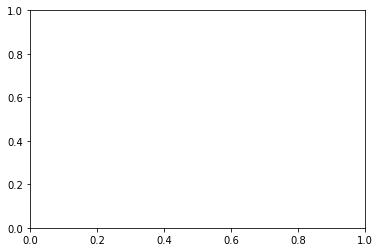

In [ ]:
plt.plot(tab_C, tab_score[:, 0])
plt.plot(tab_C, tab_score[:, 1])
plt.plot(tab_C, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"], loc='upper right', bbox_to_anchor=(1, 0.9))
plt.xlabel("C")


[[-6.43248041e+01  9.67914475e+00  4.75846322e+00 -1.25764550e+01
  -8.46643387e+00  5.97318558e+00 -7.19443758e-01  1.29883369e+00
  -3.38760030e+00 -6.63705182e+00  4.68461335e-01  2.73112849e-01
   6.72677763e-02 -4.62570114e-01 -1.00796623e+01  2.00166084e+00
  -1.68020267e+00 -1.38512459e+00  2.74541798e+00 -1.24681989e-01
   3.46408394e-01 -1.26815689e+00]
 [-6.89471849e+01  9.69050643e+00  5.09972679e+00 -1.24616578e+01
  -8.46543285e+00  6.24858872e+00 -7.52122149e-01  1.32219465e+00
  -3.68667247e+00 -6.93115799e+00  5.98528228e-01  4.06841678e-01
   1.37089563e-01 -3.96923266e-01 -1.05965375e+01  2.05999806e+00
  -1.74715850e+00 -1.46232664e+00  2.82858862e+00 -1.24925769e-01
   3.28104653e-01 -1.26806398e+00]
 [-7.36265109e+01  9.70306610e+00  5.44548916e+00 -1.24327070e+01
  -8.47618595e+00  6.57090352e+00 -7.73888314e-01  1.33022100e+00
  -4.01548039e+00 -7.35822159e+00  7.29210167e-01  5.41922186e-01
   2.43239064e-01 -3.60403453e-01 -1.13648168e+01  2.19251501e+00
  -1.8

ValueError: ignored

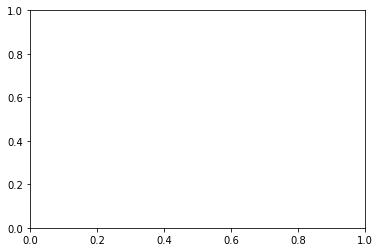

In [ ]:
matrix_coeff = np.stack(tab_score[:, 3], axis=0)
print(matrix_coeff)
print(matrix_coeff.shape)

ax = plt.subplot(111)
NUM_COLORS = matrix_coeff.shape[1]
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('Set1')

for i in range(0, matrix_coeff.shape[1]):
    lines = ax.plot(tab_C, matrix_coeff[:, i])
    lines[0].set_color(cm(i//NUM_STYLES))
    lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])

plt.xlabel("C")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
ax.legend(np.arange(0, matrix_coeff.shape[1]), loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("cross_validation_C_coeff.pdf", format="pdf")
plt.show()

In [ ]:
#tab_C = np.logspace(-2, 6, 9)
tab_C = [1e6]
tab_logC = np.log10(tab_C)
print(tab_C)
print(tab_logC)

tab_score = np.array([apply_logreg_cross_validation_coeff(X_train, y_train, {'penalty':'l1', 'C':C, 'random_state':123456, 'multi_class':"auto", 'class_weight':{0:0.044, 1:1-0.044}, 'solver':"liblinear", 'max_iter':1000, 'verbose':1}) for C in tab_C])
print(tab_score)

NameError: ignored